Digit Recognizer 🚦 🎱
=====

Reference
- Kaggle 'Minimum Distance Classifier' by OLGA CHERNYTSKA : https://www.kaggle.com/code/olhacher/minimum-distance-classifier

In [3]:
# import libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import sklearn
import sklearn.cluster
from sklearn.model_selection import train_test_split
from ipycanvas import canvas
from Visualization import *

In [4]:
# load data
X = pd.read_csv('input/train.csv')
y = X.iloc[:,0]

## Sample Visualization

In [5]:
label_1=X.loc[X['label']==1] # Slicing rows is label '1' 
label_1idx=label_1.index # Extract index of data 'label_1'

In [19]:
rdsample = pd.DataFrame([])
rdsample_list = rd.sample(list(label_1idx),100) # 100 random samples of label '1'
rdsample = X.iloc[rdsample_list,:]
Visualization(X, rdsample)

Canvas(height=560, sync_image_data=True, width=560)

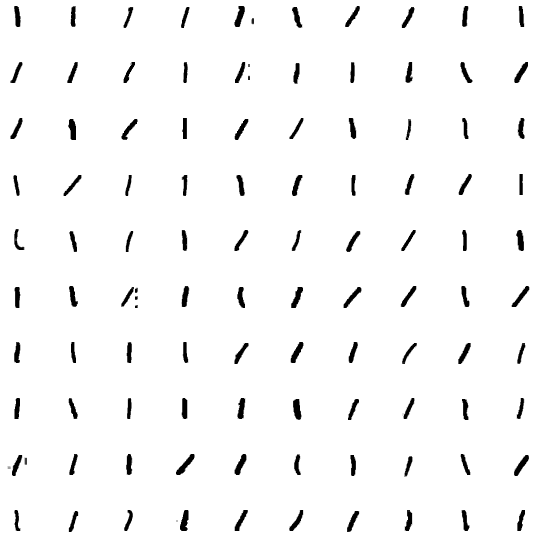

## Split Data

In [9]:
ratio = 25 # Split ratio(Test Sets Ratio)[%]
ratio = ratio/100

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ratio, shuffle=True, random_state=99)

In [11]:
print(y_train.value_counts().sort_index())
print(y_train.count())
print(y_test.value_counts().sort_index())
print(y_test.count())

0    3104
1    3498
2    3108
3    3230
4    3085
5    2871
6    3086
7    3326
8    3077
9    3115
Name: label, dtype: int64
31500
0    1028
1    1186
2    1069
3    1121
4     987
5     924
6    1051
7    1075
8     986
9    1073
Name: label, dtype: int64
10500


## Decreasing Size of Train Set

In [12]:
digit = pd.DataFrame();
centroids = pd.DataFrame();
for i in range(0,10):
    digit = X.loc[X['label']==i]
    kmeans = sklearn.cluster.KMeans(n_clusters=50, init='k-means++',n_init=1, max_iter = 20).fit(digit)
    centroids = pd.concat([centroids,pd.DataFrame(kmeans.cluster_centers_).astype(int)]).reset_index(drop=True)
X_t = centroids.iloc[:,1:]
y_t = centroids.iloc[:,0]
print(y_t.value_counts())

0    50
1    50
2    50
3    50
4    50
5    50
6    50
7    50
8    50
9    50
Name: 0, dtype: int64


### Cluster Centroid Visualization

In [13]:
rdsample = pd.DataFrame([])
rdsample_list = rd.sample(list(X_t),100) # 100 random samples of cluster centroid
rdsample = X.iloc[rdsample_list,:]
Visualization(X, rdsample)

Canvas(height=560, sync_image_data=True, width=560)

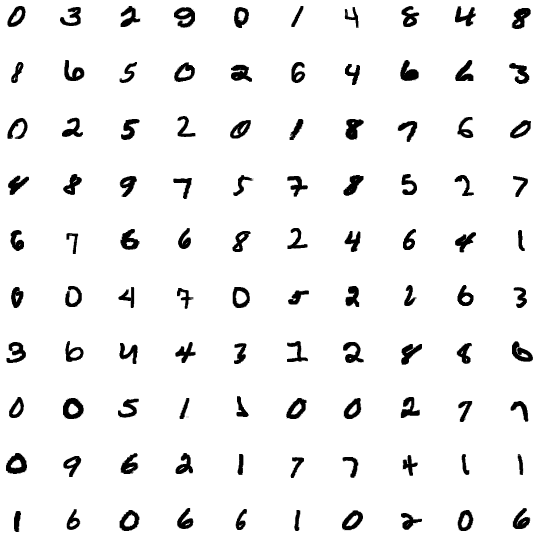

## Prediction

### Test Set

In [14]:
# Attempt to DataFrame : can Not use it
# d = pd.DataFrame();
# d_sum = pd.DataFrame();
# distances = pd.DataFrame();
# m = len(X_t);
# n = len(X_test);
# p_max = int(n / 500); # Max rows of Dataframe in Jypyterlab : 500
# range_op = 0; # for j range
# for j range
# for p in range(0,1): # 1 <- p_max
#    range_op1 = 500 * p
#    range_op2 = 500 * (p+1)

# for j in range(range_op1,range_op2):
#        d = (X_t.iloc[k,:] - X_test.iloc[j,1:])*(X_t.iloc[k,:] - X_test.iloc[j,1:])
#    d_sum = pd.DataFrame(d.sum(axis=1))
#    d_sum = d_sum.transpose()
#    distances = distances.append(pd.DataFrame(d_sum).astype(int), ignore_index=True)
# d.to_csv('TestData\d')
# d_sum.to_csv('TestData/d_sum')
# distances.to_csv('TestData/distances')

In [60]:
distances = np.array([]);
m = len(X_t)
n = len(X_test)
minidx = np.array([]);
p_max = int(n / 500);
range_op = 0; # for j range
# for j range
for p in range(0,p_max): # 1 <- p_max
    range_op1 = 500 * p
    range_op2 = 500 * (p+1)
    # Calculating distances
    for j in range(range_op1, range_op2): 
        replica = [X_test.iloc[j,1:] for k in range(0,m)]
        replica = np.array(replica)
        d = (X_t - replica)*(X_t - replica) # Calculate MSE
        d_sum = d.sum(axis=1) # d rowsums
        minidx = np.append(minidx, np.argmin(d_sum)).astype(int) # index of min value on rowsums
        distances = np.append(distances,d_sum,axis=0).astype(int) # store d_sum vlaue

print('Complete.')       

Complete.


In [61]:
result_test = minidx // 50
zero_counts_test1 = result_test - y_test
zero_counts_test2 = len(zero_counts_test1[zero_counts_test1==0])
accuracy_test = (zero_counts_test2 / len(X_test)) * 100
print('accuracy(test_set):{:.2f}%'.format(accuracy_test))

accuracy(test_set):96.28%


In [62]:
result_table = pd.DataFrame([])
result_table = pd.concat([result_table,pd.DataFrame(result_test).value_counts().sort_index()]).astype(int)
result_table = pd.concat([result_table,pd.DataFrame(y_test).value_counts().sort_index()],axis=1).astype(int)
result_table.index = ['0','1','2','3','4','5','6','7','8','9']
result_table.columns = ['prediction','actual']
result_table.transpose()

,0,1,2,3,4,5,6,7,8,9
prediction,1028,1205,1059,1096,988,942,1064,1070,964,1084
actual,1028,1186,1069,1121,987,924,1051,1075,986,1073


#### Visualization : Test Set vs Cluster Centroid

In [63]:
X_test2 = X_test.iloc[100:200,:]
Visualization(X, X_test2)

Canvas(height=560, sync_image_data=True, width=560)

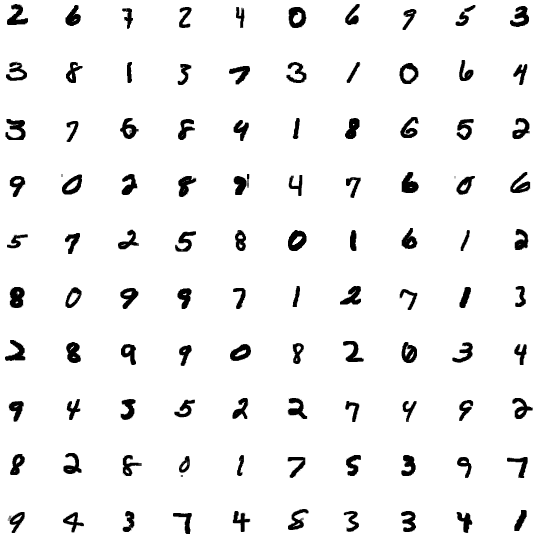

In [64]:
X_t2 = X_t.iloc[minidx[100:200],:]
Visualization(X, X_t2)

Canvas(height=560, sync_image_data=True, width=560)

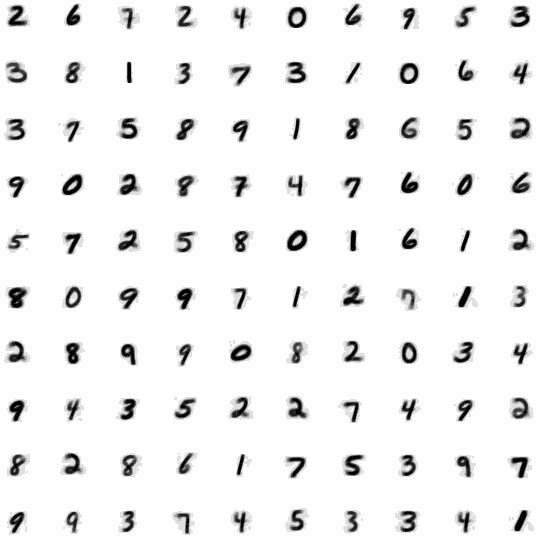

### Train Set

In [20]:
distances = np.array([]);
m = len(X_t)
n = len(X_train)
minidx = np.array([]);
p_max = int(n / 500);
range_op = 0; # for j range
# for j range
for p in range(0,p_max): # 1 <- p_max
    range_op1 = 500 * p
    range_op2 = 500 * (p+1)
    # Calculating distances
    for j in range(range_op1, range_op2): 
        replica = [X_train.iloc[j,1:] for k in range(0,m)]
        replica = np.array(replica)
        d = (X_t - replica)*(X_t - replica)
        d_sum = d.sum(axis=1)
        minidx = np.append(minidx, np.argmin(d_sum)).astype(int)
        distances = np.append(distances,d_sum,axis=0).astype(int)

print('Complete.')       

Complete.


In [54]:
result_train = minidx // 50
zero_counts_train1 = result_train - y_train
zero_counts_train2 = len(zero_counts_train1[zero_counts_train1==0])
accuracy_test = (zero_counts_train2 / len(X_train)) * 100
print('accuracy(train_set):{:.2f}%'.format(accuracy_test))

accuracy(train_set):96.01%


In [59]:
result_table = pd.DataFrame([])
result_table = pd.concat([result_table,pd.DataFrame(result_train).value_counts().sort_index()]).astype(int)
result_table = pd.concat([result_table,pd.DataFrame(y_train).value_counts().sort_index()],axis=1).astype(int)
result_table.index = ['0','1','2','3','4','5','6','7','8','9']
result_table.columns = ['prediction','actual']
result_table.transpose()

,0,1,2,3,4,5,6,7,8,9
prediction,3116,3556,3077,3138,3013,2931,3123,3325,3033,3188
actual,3104,3498,3108,3230,3085,2871,3086,3326,3077,3115
